### NetSim Dataset Multiclass Classification - CIIC Research - José P. Areia

**The table below represents all the fields of the dataset as well as their descriptions and the encoding process done in each one of the fields.**

Type of pre-processing / data encoding done: <mark>Categorical Values (Dummies)</mark>, <mark>Z-Score Normalization</mark>, <mark>Empty Cells Filling</mark>, and <mark>Value Replacing.</mark>

It's important to notice that the fields **attack_type** and **is_malicious** were later added to the dataset in order to distinguish normal traffic from the malicious one, and to identify what type of attack was done. The list below represents a numerical classification represented in the field **attack_type**.

- \[0\] - Normal
- \[1\] - DoS
- \[2\] - Sinkhole

| Field                        | Description                                                                                                                            |  Deleted | Categorical Values (Dummies) | Z-Score Normalization | Empty Cells Filling |
|:------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------|:--------:|:----------------------------:|:---------------------:|:-------------------:|
| ipv6.plen                    | Payload length                                                                                                                         | -        | -                            | &#x2714;              | &#x2714;            |
| icmpv6.rpl.dao.sequence      | DAO Sequence                                                                                                                           | &#x2714; | -                            | -                     | -                   |
| frame.protocols              | Protocols in frame                                                                                                                     | &#x2714; | -                            | -                     | -                   |
| ip.len                       | Total Length                                                                                                                           | -        | &#x2714;                     | -                     | -                   |
| icmpv6.rpl.dio.dagid         | DODAGID - Identifies a DODAG [RFC 9009](https://www.rfc-editor.org/rfc/rfc9009.html#name-destination-cleanup-object-)                  | &#x2714; | -                            | -                     | -                   |
| ip.src                       | Source Address                                                                                                                         | &#x2714; | -                            | -                     | -                   |
| ipv6.dst                     | Destination address                                                                                                                    | &#x2714; | -                            | -                     | -                   |
| ip.dst                       | Destination address                                                                                                                    | &#x2714; | -                            | -                     | -                   |
| ip.version                   | Version                                                                                                                                | -        | &#x2714;                     | -                     | -                   |
| icmpv6.rpl.opt.target.prefix | Target                                                                                                                                 | &#x2714; | -                            |                       | -                   |
| frame.len                    | Frame length on the wire                                                                                                               | -        | -                            | &#x2714;              | -                   |
| icmpv6.rpl.opt.type          | RPL Options type                                                                                                                       | -        | &#x2714;                     | -                     | -                   |
| icmpv6.code                  | ICMPv6 Code - [IANA Table Code](https://www.iana.org/assignments/icmpv6-parameters/icmpv6-parameters.xhtml#icmpv6-parameters-3)        | -        | &#x2714;                     | -                     | -                   |
| udp.srcport                  | Source port                                                                                                                            | &#x2714; | -                            | -                     | -                   |
| ipv6.nxt                     | Next header                                                                                                                            | -        | &#x2714;                     | -                     | -                   |
| udp.length                   | UDP Frame length                                                                                                                       | &#x2714; | -                            | -                     | -                   |
| ip.proto                     | Protocol                                                                                                                               | -        | -                            | -                     | &#x2714;            |
| ipv6.src                     | Source address                                                                                                                         | &#x2714; | -                            | -                     | -                   |
| icmpv6.rpl.opt.length        | Option length                                                                                                                          | -        | -                            | &#x2714;              | &#x2714;            |
| udp.dstport                  | Destination port                                                                                                                       | &#x2714; | -                            | -                     | -                   |
| icmpv6.rpl.dio.rank          | DIO Rank                                                                                                                               | -        | -                            | &#x2714;              | &#x2714;            |
| icmpv6.type                  | ICMPv6 Type - [IANA Type Table Codes](https://www.iana.org/assignments/icmpv6-parameters/icmpv6-parameters.xhtml#icmpv6-parameters-2)  | -        | -                            | -                     | &#x2714;            |
| ip.flags                     | Flags                                                                                                                                  | &#x2714; | -                            | -                     | -                   |
| ipv6.version                 | Version                                                                                                                                | &#x2714; | -                            | -                     | -                   |
| tcp.dstport                  | Destination Port                                                                                                                       | &#x2714; | -                            | -                     | -                   |
| tcp.flags                    | Flags                                                                                                                                  | &#x2714; | -                            | -                     | -                   |
| tcp.len                      | TCP Segment Len                                                                                                                        | &#x2714; | -                            | -                     | -                   |
| tcp.nxtseq                   | Next Sequence Number                                                                                                                   | &#x2714; | -                            | -                     | -                   |
| tcp.port                     | Source or Destination Port                                                                                                             | &#x2714; | -                            | -                     | -                   |
| tcp.srcport                  | Source Port                                                                                                                            | &#x2714; | -                            | -                     | -                   |
| **is_malicious**\*           | Distinguish normal traffic from malicious one                                                                                          | -        | -                            | -                     | -                   |
| **attack_type**\*            | Type of attack                                                                                                                         | -        | -                            | -                     | -                   |

In [1]:
# Tensorflow logging: OFF
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

**The next blocks of code are for defining the methods used for the pre-processing and data encoding.**

The methods are the following: <mark>read_data</mark>, <mark>delete_fields</mark>, <mark>fill_empty_cells</mark>, <mark>zscore_fields_normalization</mark>, <mark>dummy_encode</mark>, and <mark>value_replacing</mark>. More details in the blocks of code below.

In [2]:
import pandas as pd

# Import dataset
def read_data(dataset):
    df = pd.read_csv(dataset)
    return df

    print(f'[DONE] Dataset Import')

In [ ]:
# Delete Unnecessary Fields
def delete_fields(df, fields):
    for i in fields:
        df.drop(i, axis = 1, inplace = True)
        
    print(f'[DONE] Fields Deleted')

In [ ]:
# Fill Empty Cells With N Value
def fill_empty_cells(df, fields, n):
    for i in fields:
        df[i] = df[i].fillna(n)
    
    print(f'[DONE] Empty Cells Filling')

In [ ]:
from scipy.stats import zscore

# Z-Score Normalization
def zscore_normalization(df, fields):
    for i in fields:
        df[i] = zscore(df[i])

    print(f'[DONE] Z-Score Normalization')

In [ ]:
# Replace old value for a new one 
def value_replacing(df, field, old_value, new_value):
    df[field] = df[field].replace(old_value, new_value)

    print(f'[DONE] Value Replacing')

In [ ]:
# Convert fields to dummy variables
def dummy_encode(df, fields):
    for i in fields:
        df = pd.concat([df, pd.get_dummies(df[i], prefix = i)], axis = 1)
        df.drop(i, axis = 1, inplace = True)
    
    print(f'[DONE] Categorical Values (Dummies)')
    
    return df

In [ ]:
# Import Dataset & Read Data
df = read_data('Datasets/NetSim/Final_Dataset.csv')

The above code will reproduce an warning saying the following **"DtypeWarning: Columns (4,22) have mixed types"**. Since the the collumns 4 and 22 represent the fields <mark>icmpv6.rpl.dio.dagid</mark> and <mark>tcp.flags</mark> respectively, and these collumns are going to be deleted later in this notebook, there is no problem whatsoever about the warning shown.

In [ ]:
# Fields -- Deleted Fields
f_delete = [
    'icmpv6.rpl.dao.sequence', 'frame.protocols', 'icmpv6.rpl.dio.dagid', 'ip.src', 'ipv6.dst', 'ip.dst',
    'icmpv6.rpl.opt.target.prefix', 'udp.srcport', 'udp.length', 'ipv6.src', 'udp.dstport', 'ip.flags',
    'ipv6.version', 'tcp.dstport', 'tcp.flags', 'tcp.len', 'tcp.nxtseq', 'tcp.port', 'tcp.srcport'
]

delete_fields(df, f_delete)

In [ ]:
# Fields -- Empty Cells Filling
fill_0 = [
    'ipv6.plen', 'ip.proto', 'icmpv6.rpl.opt.length', 'icmpv6.rpl.dio.rank', 'icmpv6.type'
]

fill_empty_cells(df, fill_0, 0) # Fill: 0

In [ ]:
# Empty Cells Filling + Convert to Object
dummy_fields = [
    'icmpv6.code', 'ip.len', 'ip.version', 'ipv6.nxt', 'icmpv6.rpl.opt.type'
]

for i in dummy_fields:
    df[i] = df[i].fillna(0)
    df[i] = df[i].astype(object)
    
print(f'[DONE] Empty Cells Filling + Convert to Object -- Categorical Values')    

#### SMOTE-NC Application

In [ ]:
# Split dataset -- Train + Test
df_train = df.sample(frac = 0.75, random_state = 10)
df_test = df.drop(df_train.index)

print(f'[DONE] Split dataset -- Train + Test')    

In [ ]:
def apply_smotenc_bigdata(df: pd.DataFrame, label: str, categorical_indices: list = [], random_state: int = 0) -> pd.DataFrame:
    import numpy as np  
    from imblearn.over_sampling import SMOTENC
    
    # Make a copy of the input dataframe and separate the target variable column
    X_resampled = df.copy()
    X_resampled = X_resampled.drop(columns=[label])
    y_resampled = df[label].copy()
    
    # Apply the SMOTENC algorithm to oversample the dataset
    print(f"Starting SMOTENC -- Size of the dataframe: {df.size} ")
    
    # Apply the SMOTENC algorithm to oversample the dataset
    smote_nc = SMOTENC(
        categorical_features = categorical_indices, 
        random_state = random_state,
        sampling_strategy = "minority"
    )

    for labels in np.unique(y_resampled):
        X_resampled, y_resampled = smote_nc.fit_resample(X_resampled, y_resampled)
    
    df_smote = pd.DataFrame(X_resampled, columns = X_resampled.columns)
    df_smote[label] = y_resampled
    
    # Print the size of the original and oversampled datasets, and return the oversampled dataset
    print(f"Finished SMOTENC -- Size of the dataframe: {df_smote.size}")
    
    return df_smote

In [ ]:
features = [ col for col in df_train.columns if col not in ["attack_type"]]
featuresIndex = []

for i in dummy_fields:
    featuresIndex.append(features.index(i))

df_train = apply_smotenc_bigdata(
    df = df_train, 
    label = "attack_type",
    categorical_indices = featuresIndex,
    random_state = 10
)

print(f'[DONE] SMOTE-NC Application')

In [ ]:
# Concat the train STOME dataframe with the test
df = pd.concat([df_train, df_test], keys = [0, 1])

#### Resuming the Data Encoding

In [ ]:
# Fields -- Z-Score Normalization
zscore_fields = [
    'ipv6.plen', 'frame.len', 'icmpv6.rpl.opt.length', 'icmpv6.rpl.dio.rank'
]

zscore_normalization(df, zscore_fields)

In [ ]:
df = df.replace({'attack_type' : {6:1, 7:2}})
df = df.replace({'icmpv6.type' : {155:1}})

print(f'[DONE] Value Replacing')

In [ ]:
# Fields -- Categorical Values
dummy_fields = [
    'icmpv6.code', 'ip.len', 'ip.version', 'ipv6.nxt', 'icmpv6.rpl.opt.type'
]

df = dummy_encode(df, dummy_fields)

In [ ]:
# Save the dataset
df.to_csv("Datasets/NetSim/SMOTE_Dataset.csv")

> &#x26a0; **If the SMOTE-NC was already done, you can just go from this point further.**

In [3]:
# Import Dataset & Read Data
df = read_data('Datasets/NetSim/SMOTE_Dataset.csv')

In [4]:
import numpy as np

# Convert to Numpy Classification

# Classification Type: 0 - Binary / 1 - Multiclass
classification_type = 1

# For a multiclass classification, drop both 'is_malicious' and 'attack_type' collumn

# For a binary classification, use 'is_malicious' as target collumn
# For a multiclass classification, use 'attack_type' as target collumn

if (classification_type):
    x_columns = df.columns.drop(['attack_type', 'is_malicious'])
    dummies = pd.get_dummies(df['attack_type'])
else:
    x_columns = df.columns.drop('is_malicious')
    dummies = pd.get_dummies(df['is_malicious'])
    
x = df[x_columns].values
attack = dummies.columns
y = dummies.values

print(f'[DONE] Numpy Classification')

[DONE] Numpy Classification


In [5]:
from sklearn.model_selection import train_test_split

# Training validation splitting 
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.25,
    random_state = 10
)

print(f'[DONE] Training + Validation splitting')

[DONE] Training + Validation splitting


In [6]:
import pickle as pkl

# Save training dataset
with open("Saved_Datasets/NetSim/NetSim_Training_Dataset_FINAL_SMOTENC.pkl", "wb") as f:
    pkl.dump([x_train, y_train], f)
    
# Save test dataset
with open("Saved_Datasets/NetSim/NetSim_Testing_Dataset_FINAL_SMOTENC.pkl", "wb") as f:
    pkl.dump([x_test, y_test], f)
    
print(f'[DONE] Training dataset saved')
print(f'[DONE] Testing dataset saved')

[DONE] Training dataset saved
[DONE] Testing dataset saved


#### If the dataset splited is already saved, you can go from this point furhter without running the blocks of code above.

The datasets are the following (<mark>both are saved under the directory Saved_Datasets</mark>):
- NetSim_Training_Dataset.pkl
- NetSim_Testing_Dataset.pkl

In [ ]:
import pickle as pkl

# Load training dataset 
with open("Saved_Datasets/NetSim/NetSim_Training_Dataset_FINAL_SMOTENC.pkl", "rb") as f:
    x_train, y_train = pkl.load(f)

# Load testing dataset 
with open("Saved_Datasets/NetSim/NetSim_Testing_Dataset_FINAL_SMOTENC.pkl", "rb") as f:
    x_test, y_test = pkl.load(f)

print(f'[DONE] Training dataset loaded')
print(f'[DONE] Testing dataset loaded')

In [7]:
import tensorflow.keras
from tensorflow.keras import backend as K

# Metrics for real-time usage in the model below
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Neural Network Model
model = Sequential()
model.add(Dense(50, input_dim = x.shape[1], activation = 'relu')) # Hidden 1
model.add(Dropout(0.5))
model.add(Dense(25, activation = 'relu')) # Hidden 2
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation = 'softmax')) # Output
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = [f1_m])

# Early Stopping
monitor = EarlyStopping(
    monitor = 'val_loss', 
    min_delta = 1e-3, patience = 10, 
    verbose = 1, mode = 'auto', 
    restore_best_weights = True
)

# Reduce On Plateau
reduce = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.5,
    patience = 10,
    verbose = 1,
    mode = 'auto',
    min_lr = 1e-5
)

# Model
model.fit(
    x_train, 
    y_train, 
    validation_data = (x_test, y_test), 
    callbacks = [reduce],
    verbose = 2,
    epochs = 200
)

# Save the model
model.save('Saved_Models/NetSim/NetSim_Multiclass_SMOTENC_MODEL.h5')

Epoch 1/200
58440/58440 - 120s - loss: 204.3186 - f1_m: 0.0113 - val_loss: 1.0899 - val_f1_m: 0.0000e+00 - lr: 0.0010 - 120s/epoch - 2ms/step
Epoch 2/200
58440/58440 - 80s - loss: 1.0973 - f1_m: 1.0371e-05 - val_loss: 1.0898 - val_f1_m: 1.8667e-05 - lr: 0.0010 - 80s/epoch - 1ms/step
Epoch 3/200
58440/58440 - 70s - loss: 1.1007 - f1_m: 1.3324e-04 - val_loss: 1.0899 - val_f1_m: 3.7334e-04 - lr: 0.0010 - 70s/epoch - 1ms/step
Epoch 4/200
58440/58440 - 70s - loss: 1.1473 - f1_m: 3.4697e-04 - val_loss: 1.0896 - val_f1_m: 4.7601e-04 - lr: 0.0010 - 70s/epoch - 1ms/step
Epoch 5/200
58440/58440 - 70s - loss: 1.1038 - f1_m: 3.9305e-04 - val_loss: 1.0895 - val_f1_m: 6.3779e-04 - lr: 0.0010 - 70s/epoch - 1ms/step
Epoch 6/200
58440/58440 - 70s - loss: 1.1324 - f1_m: 4.1804e-04 - val_loss: 1.0895 - val_f1_m: 5.9424e-04 - lr: 0.0010 - 70s/epoch - 1ms/step
Epoch 7/200
58440/58440 - 70s - loss: 1.1128 - f1_m: 4.7637e-04 - val_loss: 1.0894 - val_f1_m: 6.4402e-04 - lr: 0.0010 - 70s/epoch - 1ms/step
Epoch 

Epoch 59/200
58440/58440 - 91s - loss: 0.9777 - f1_m: 0.2267 - val_loss: 0.7871 - val_f1_m: 0.4290 - lr: 5.0000e-04 - 91s/epoch - 2ms/step
Epoch 60/200
58440/58440 - 77s - loss: 0.9751 - f1_m: 0.2326 - val_loss: 0.7999 - val_f1_m: 0.4059 - lr: 5.0000e-04 - 77s/epoch - 1ms/step
Epoch 61/200
58440/58440 - 71s - loss: 0.9711 - f1_m: 0.2313 - val_loss: 0.6673 - val_f1_m: 0.5340 - lr: 5.0000e-04 - 71s/epoch - 1ms/step
Epoch 62/200
58440/58440 - 70s - loss: 0.9612 - f1_m: 0.2431 - val_loss: 0.7733 - val_f1_m: 0.4365 - lr: 5.0000e-04 - 70s/epoch - 1ms/step
Epoch 63/200
58440/58440 - 89s - loss: 0.9604 - f1_m: 0.2399 - val_loss: 0.6883 - val_f1_m: 0.5288 - lr: 5.0000e-04 - 89s/epoch - 2ms/step
Epoch 64/200
58440/58440 - 89s - loss: 0.9623 - f1_m: 0.2378 - val_loss: 0.8029 - val_f1_m: 0.4069 - lr: 5.0000e-04 - 89s/epoch - 2ms/step
Epoch 65/200
58440/58440 - 86s - loss: 0.9629 - f1_m: 0.2369 - val_loss: 0.7948 - val_f1_m: 0.4269 - lr: 5.0000e-04 - 86s/epoch - 1ms/step
Epoch 66/200
58440/58440 - 

Epoch 117/200
58440/58440 - 71s - loss: 0.6972 - f1_m: 0.4654 - val_loss: 0.5424 - val_f1_m: 0.5563 - lr: 1.2500e-04 - 71s/epoch - 1ms/step
Epoch 118/200
58440/58440 - 71s - loss: 0.6950 - f1_m: 0.4662 - val_loss: 0.5431 - val_f1_m: 0.5484 - lr: 1.2500e-04 - 71s/epoch - 1ms/step
Epoch 119/200

Epoch 119: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
58440/58440 - 71s - loss: 0.6927 - f1_m: 0.4686 - val_loss: 0.5416 - val_f1_m: 0.5457 - lr: 1.2500e-04 - 71s/epoch - 1ms/step
Epoch 120/200
58440/58440 - 70s - loss: 0.6328 - f1_m: 0.5061 - val_loss: 0.5189 - val_f1_m: 0.5577 - lr: 6.2500e-05 - 70s/epoch - 1ms/step
Epoch 121/200
58440/58440 - 71s - loss: 0.6314 - f1_m: 0.5048 - val_loss: 0.4531 - val_f1_m: 0.7763 - lr: 6.2500e-05 - 71s/epoch - 1ms/step
Epoch 122/200
58440/58440 - 70s - loss: 0.6282 - f1_m: 0.5076 - val_loss: 0.5183 - val_f1_m: 0.5546 - lr: 6.2500e-05 - 70s/epoch - 1ms/step
Epoch 123/200
58440/58440 - 70s - loss: 0.6306 - f1_m: 0.5048 - val_loss: 0.5216 -

Epoch 174/200
58440/58440 - 91s - loss: 0.5067 - f1_m: 0.7514 - val_loss: 0.2990 - val_f1_m: 0.9434 - lr: 1.5625e-05 - 91s/epoch - 2ms/step
Epoch 175/200
58440/58440 - 105s - loss: 0.5043 - f1_m: 0.7540 - val_loss: 0.2935 - val_f1_m: 0.9481 - lr: 1.5625e-05 - 105s/epoch - 2ms/step
Epoch 176/200
58440/58440 - 124s - loss: 0.5032 - f1_m: 0.7544 - val_loss: 0.2638 - val_f1_m: 0.9474 - lr: 1.5625e-05 - 124s/epoch - 2ms/step
Epoch 177/200
58440/58440 - 74s - loss: 0.4768 - f1_m: 0.7385 - val_loss: 0.3792 - val_f1_m: 0.8052 - lr: 1.5625e-05 - 74s/epoch - 1ms/step
Epoch 178/200
58440/58440 - 70s - loss: 0.4800 - f1_m: 0.7425 - val_loss: 0.3600 - val_f1_m: 0.9806 - lr: 1.5625e-05 - 70s/epoch - 1ms/step
Epoch 179/200
58440/58440 - 70s - loss: 0.4794 - f1_m: 0.7503 - val_loss: 0.2077 - val_f1_m: 0.9585 - lr: 1.5625e-05 - 70s/epoch - 1ms/step
Epoch 180/200
58440/58440 - 70s - loss: 0.4806 - f1_m: 0.7579 - val_loss: 0.1878 - val_f1_m: 0.9460 - lr: 1.5625e-05 - 70s/epoch - 1ms/step
Epoch 181/200
58

In [9]:
# Output of hyperparameters stats used in model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1750      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 78        
                                                                 
Total params: 3,103
Trainable params: 3,103
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Prediction
pred = model.predict(x_test)

19480/19480 [==============================] - 18s 926us/step


In [11]:
from sklearn import metrics

# Metrics for the classification
def compute_metrics(pred, y_test):
    predict_classes = np.argmax(pred, axis = 1)
    expected_classes = np.argmax(y_test, axis = 1)
    
    correct = metrics.accuracy_score(expected_classes, predict_classes)
    print(f"Accuracy: {correct}")
    
    recall = metrics.recall_score(expected_classes, predict_classes, average = 'weighted')    
    print(f"Recall: {recall}")
       
    precision = metrics.precision_score(expected_classes, predict_classes, average = 'weighted')
    print(f"Precision: {precision}")
    
    f1score = metrics.f1_score(expected_classes, predict_classes, average = 'weighted')
    print(f"F1Score: {f1score}")
    
compute_metrics(pred, y_test)

Accuracy: 0.9737628598883779
Recall: 0.9737628598883779
Precision: 0.9756142092298515
F1Score: 0.9740081722041903


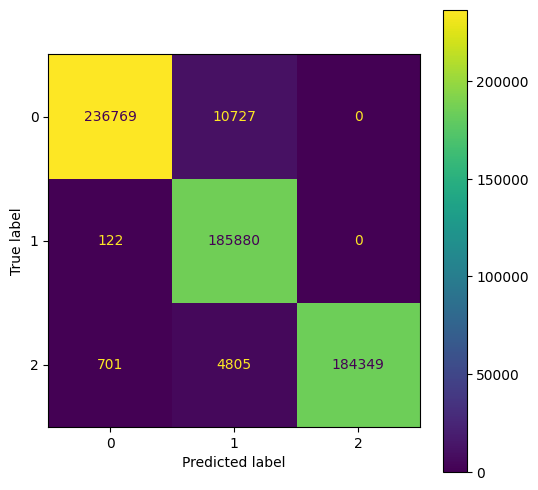

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
predict_classes = np.argmax(pred, axis = 1)
expected_classes = np.argmax(y_test, axis = 1)    
    
cm = confusion_matrix(expected_classes, predict_classes)
cmd = ConfusionMatrixDisplay(cm)

# Plot size
fig, ax = plt.subplots(figsize = (6, 6))

cmd.plot(ax = ax)

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

# Usage of ExtraTreesClassifier for feature selection
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)
extra_tree_forest.fit(x, y)
feature_importance = extra_tree_forest.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

print(f'[DONE] Extra Trees Classifier')

[DONE] Extra Trees Classifier


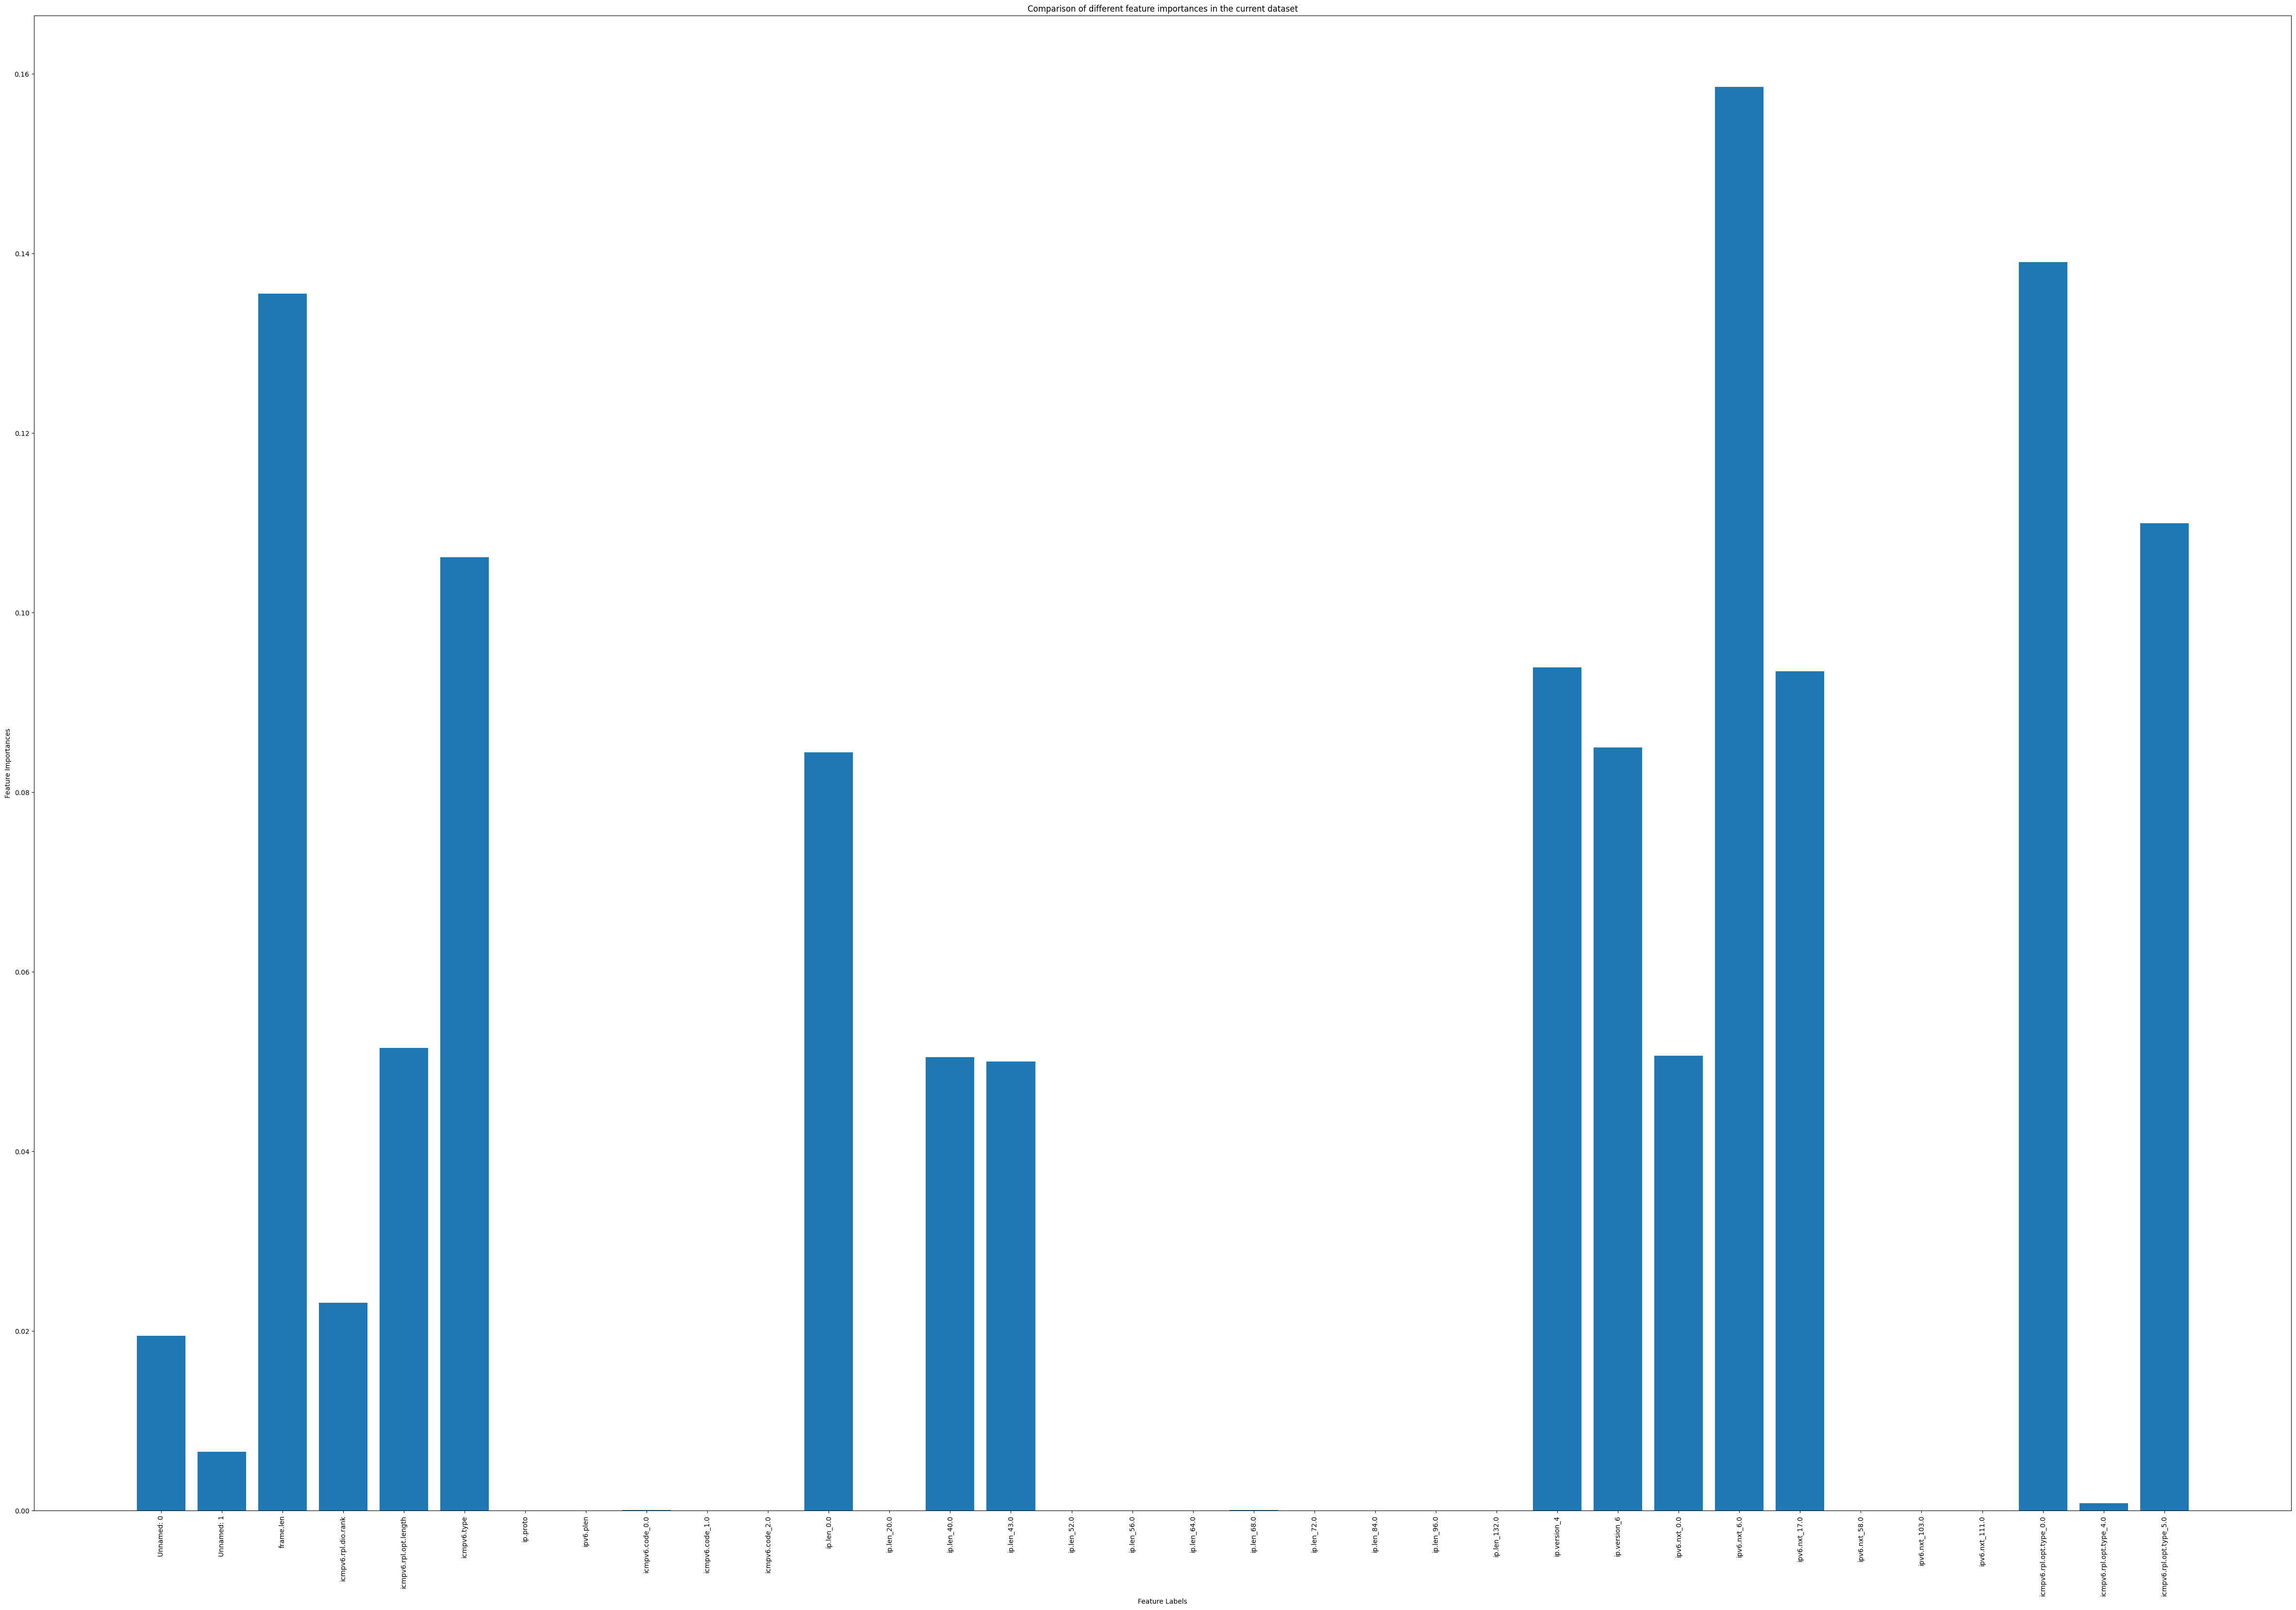

In [15]:
import matplotlib.pyplot as plot

# Plor for the ExtraTreesClassifier output
plot.bar(x_columns, feature_importance_normalized)
plot.xlabel('Feature Labels')
plot.ylabel('Feature Importances')
plot.title('Comparison of different feature importances in the current dataset')
plot.xticks(rotation = 90)

# Plot size
plot.rcParams["figure.figsize"] = (60, 40)

plot.show()